<a href="https://colab.research.google.com/github/yelagampragathi/NLP_16/blob/main/CRAZYCATS_ASS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading and Preprocessing Multilingual Data



In [ ]:
# Import necessary libraries from TensorFlow's Keras
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


Step 2: Load and Preprocess Data

In [ ]:
# Define the multilingual dataset
data = {
    'English': ['Hello world', 'Machine learning is fun'],
    'Telugu': ['హలో ప్రపంచం', 'యంత్ర విద్య ఆసక్తికరమైనది'],
    'Hindi': ['नमस्ते दुनिया', 'मशीन लर्निंग मजेदार है'],
    'Tamil': ['வணக்கம் உலகம்', 'மஷின் லேர்னிங் சுவாரஸ்யமாக உள்ளது'],
    'Malayalam': ['ഹലോ ലോകം', 'മഷീൻ ലേണിംഗ് രസകരമാണ്']
}

In [ ]:
# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=5000)

# Combine all sentences from different languages into a single list
all_sentences = [sentence for sublist in data.values() for sentence in sublist]

# Fit the Tokenizer on the combined list of sentences
tokenizer.fit_on_texts(all_sentences)

In [ ]:
# Define a function to tokenize and pad sentences
def tokenize_and_pad(sentences):
    # Convert sentences to sequences of integers
    sequences = tokenizer.texts_to_sequences(sentences)
    # Pad sequences to a fixed length
    return pad_sequences(sequences, maxlen=100)

# Tokenize and pad sentences for each language and concatenate them
X = np.concatenate([
    tokenize_and_pad(data['English']),
    tokenize_and_pad(data['Telugu']),
    tokenize_and_pad(data['Hindi']),
    tokenize_and_pad(data['Tamil']),
    tokenize_and_pad(data['Malayalam'])
], axis=0)

# Create dummy labels for simplicity; replace with actual labels if available
y = np.array([0, 1] * (len(all_sentences) // 2))  # Dummy binary labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Build and Train the RNN Model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))  # Dropout layer to combat overfitting
model.add(LSTM(32))
model.add(Dropout(0.5))  # Dropout layer to combat overfitting
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on multilingual data
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3333 - loss: 0.6987 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 0.6667 - loss: 0.6847 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5000 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5000 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5000 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6928


Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6911
Test Loss: 0.6911
Test Accuracy: 0.5000


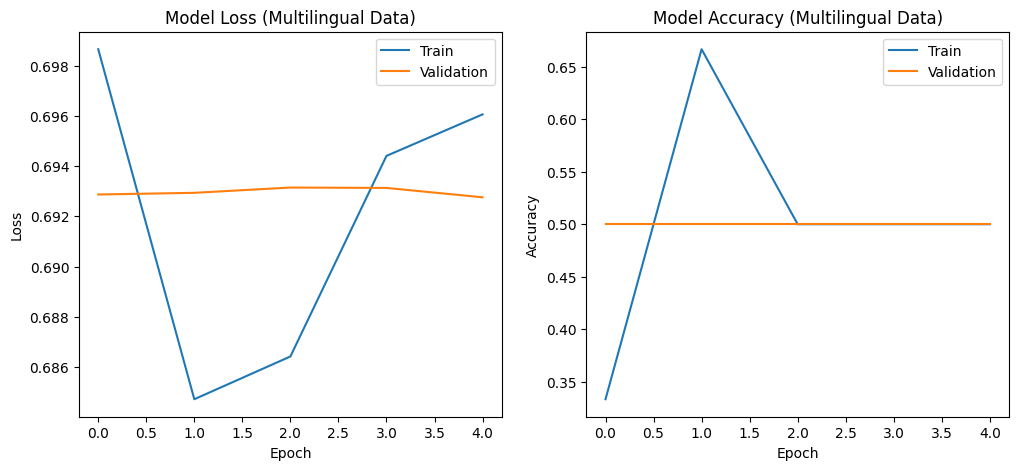

In [ ]:
# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Multilingual Data)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Multilingual Data)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()
